# 2. Small Worlds and Large Worlds

In [4]:
import pymc3 as pm
import numpy as np
import scipy.stats as stats
import seaborn as sb
import matplotlib.pyplot as plt
import arviz as az
import sys

In [5]:
# Checking Conda environment|
# sys.path
# sys.executable

'/Users/Berto/anaconda3/envs/rethinking/bin/python'

In [21]:
sb.set_context('notebook')

In [9]:
%config InlineBackend.figure_format = 'retina'
az.style.use('seaborn-darkgrid')
# az.style.use('arviz-darkgrid')

## Code 2.1

In [11]:
ways = np.array([0,3,8,9,0])
ways / sum(ways)

array([0.  , 0.15, 0.4 , 0.45, 0.  ])

## Code 2.2
The probability of observing $W$ waters and $L$ lands, with probability $p$ of water on each toss, is:  

$$ Pr(W,L|p) = \frac{(W+L)!}{W!L!} p^W (w-p)^L $$

>> *The counts of "water" W and "land" L are distributed binomially, *  
>> *with probability p of "water" on each toss*  

The likelihood of 6 W's in 9 tosses given a fair coin toss ($p=0.5$), with $n=W+L$ is:  

$$ Pr(W,L|p) = \frac{(n)!}{W!L!} p^W (w-p)^L $$

In [12]:
stats.binom.pmf(6, n=9, p=0.5)

0.16406250000000006

## Code 2.3

In [31]:
def posterior_grid_approx(grid_points=5, success=6, tosses=9):
    """
    """
    # define grid
    p_grid = np.linspace(0, 1, grid_points)

    # define prior
    prior = np.repeat(5, grid_points)  # uniform
    #prior = (p_grid >= 0.5).astype(int)  # truncated
    # prior = np.exp(- 5 * abs(p_grid - 0.5))  # double exp

    # compute likelihood at each point in the grid
    likelihood = stats.binom.pmf(success, tosses, p_grid)

    # compute product of likelihood and prior
    unstd_posterior = likelihood * prior

    # standardize the posterior, so it sums to 1
    posterior = unstd_posterior / unstd_posterior.sum()
    return p_grid, posterior



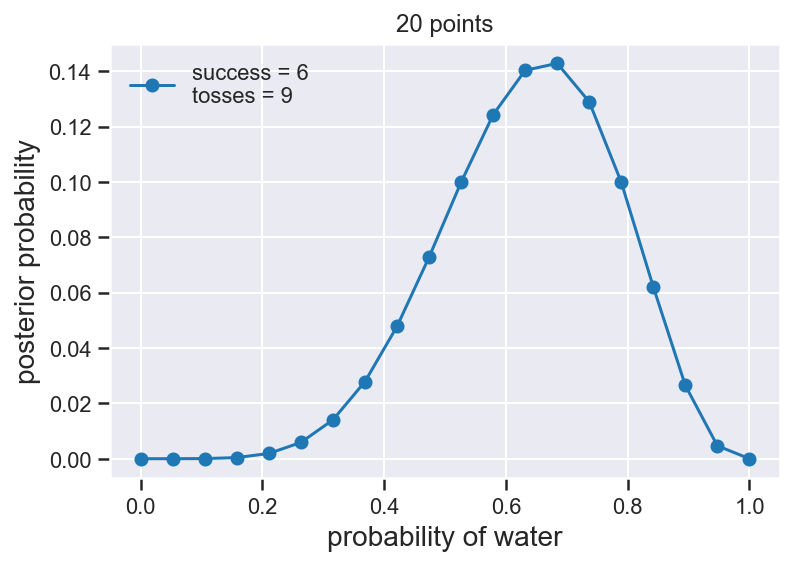

In [32]:
points = 20
w, n = 6, 9
p_grid, posterior = posterior_grid_approx(points, w, n)
plt.plot(p_grid, posterior, 'o-', label='success = {}\ntosses = {}'.format(w, n))
plt.xlabel('probability of water', fontsize=14)
plt.ylabel('posterior probability', fontsize=14)
plt.title('{} points'.format(points))
plt.legend(loc=0)



## Code 2.6
Compute the posterior using the quadratic approximation

In [36]:
data = np.repeat((0, 1), (3, 6))
with pm.Model() as normal_aproximation:
    # pymc3.sample()
    p = pm.Uniform('p', 0, 1) # uniform prior
    w = pm.Binomial('w', n=len(data), p=p, observed=data.sum()) # binomial likelihood
    mean_q = pm.find_MAP()
    std_q = ((1/pm.find_hessian(mean_q, vars=[p]))**0.5)[0]
mean_q['p'], std_q



logp = -1.8075, ||grad|| = 1.5: 100%|██████████| 7/7 [00:00<00:00, 2091.33it/s]
INFO (theano.gof.compilelock): Refreshing lock /Users/Berto/.theano/compiledir_Darwin-18.6.0-x86_64-i386-64bit-i386-3.7.4-64/lock_dir/lock

You can find the C code in this temporary file: /var/folders/sz/_92hl3ds7xs6jkyqsy9d38zh0000gn/T/theano_compilation_error_09eahpvj


Exception: Compilation failed (return status=1): /Users/Berto/.theano/compiledir_Darwin-18.6.0-x86_64-i386-64bit-i386-3.7.4-64/scan_perform/mod.cpp:11860:65: error: too many arguments to function call, expected 3, have 4.     return (*((__Pyx_PyCFunctionFast)meth)) (self, args, nargs, NULL);.            ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~                     ^~~~. /Users/Berto/anaconda3/envs/rethinking/lib/clang/9.0.1/include/stddef.h:84:18: note: expanded from macro 'NULL'. #    define NULL __null.                  ^~~~~~. /Users/Berto/.theano/compiledir_Darwin-18.6.0-x86_64-i386-64bit-i386-3.7.4-64/scan_perform/mod.cpp:12617:21: error: no member named 'exc_type' in '_ts'.     *type = tstate->exc_type;.             ~~~~~~  ^. /Users/Berto/.theano/compiledir_Darwin-18.6.0-x86_64-i386-64bit-i386-3.7.4-64/scan_perform/mod.cpp:12618:22: error: no member named 'exc_value' in '_ts'; did you mean 'curexc_value'?.     *value = tstate->exc_value;.                      ^~~~~~~~~.                      curexc_value. /Users/Berto/anaconda3/envs/rethinking/include/python3.7m/pystate.h:240:15: note: 'curexc_value' declared here.     PyObject *curexc_value;.               ^. /Users/Berto/.theano/compiledir_Darwin-18.6.0-x86_64-i386-64bit-i386-3.7.4-64/scan_perform/mod.cpp:12619:19: error: no member named 'exc_traceback' in '_ts'; did you mean 'curexc_traceback'?.     *tb = tstate->exc_traceback;.                   ^~~~~~~~~~~~~.                   curexc_traceback. /Users/Berto/anaconda3/envs/rethinking/include/python3.7m/pystate.h:241:15: note: 'curexc_traceback' declared here.     PyObject *curexc_traceback;.               ^. /Users/Berto/.theano/compiledir_Darwin-18.6.0-x86_64-i386-64bit-i386-3.7.4-64/scan_perform/mod.cpp:12626:24: error: no member named 'exc_type' in '_ts'.     tmp_type = tstate->exc_type;.                ~~~~~~  ^. /Users/Berto/.theano/compiledir_Darwin-18.6.0-x86_64-i386-64bit-i386-3.7.4-64/scan_perform/mod.cpp:12627:25: error: no member named 'exc_value' in '_ts'; did you mean 'curexc_value'?.     tmp_value = tstate->exc_value;.                         ^~~~~~~~~.                         curexc_value. /Users/Berto/anaconda3/envs/rethinking/include/python3.7m/pystate.h:240:15: note: 'curexc_value' declared here.     PyObject *curexc_value;.               ^. /Users/Berto/.theano/compiledir_Darwin-18.6.0-x86_64-i386-64bit-i386-3.7.4-64/scan_perform/mod.cpp:12628:22: error: no member named 'exc_traceback' in '_ts'; did you mean 'curexc_traceback'?.     tmp_tb = tstate->exc_traceback;.                      ^~~~~~~~~~~~~.                      curexc_traceback. /Users/Berto/anaconda3/envs/rethinking/include/python3.7m/pystate.h:241:15: note: 'curexc_traceback' declared here.     PyObject *curexc_traceback;.               ^. /Users/Berto/.theano/compiledir_Darwin-18.6.0-x86_64-i386-64bit-i386-3.7.4-64/scan_perform/mod.cpp:12629:13: error: no member named 'exc_type' in '_ts'.     tstate->exc_type = type;.     ~~~~~~  ^. /Users/Berto/.theano/compiledir_Darwin-18.6.0-x86_64-i386-64bit-i386-3.7.4-64/scan_perform/mod.cpp:12630:13: error: no member named 'exc_value' in '_ts'; did you mean 'curexc_value'?.     tstate->exc_value = value;.             ^~~~~~~~~.             curexc_value. /Users/Berto/anaconda3/envs/rethinking/include/python3.7m/pystate.h:240:15: note: 'curexc_value' declared here.     PyObject *curexc_value;.               ^. /Users/Berto/.theano/compiledir_Darwin-18.6.0-x86_64-i386-64bit-i386-3.7.4-64/scan_perform/mod.cpp:12631:13: error: no member named 'exc_traceback' in '_ts'; did you mean 'curexc_traceback'?.     tstate->exc_traceback = tb;.             ^~~~~~~~~~~~~.             curexc_traceback. /Users/Berto/anaconda3/envs/rethinking/include/python3.7m/pystate.h:241:15: note: 'curexc_traceback' declared here.     PyObject *curexc_traceback;.               ^. /Users/Berto/.theano/compiledir_Darwin-18.6.0-x86_64-i386-64bit-i386-3.7.4-64/scan_perform/mod.cpp:12686:24: error: no member named 'exc_type' in '_ts'.     tmp_type = tstate->exc_type;.                ~~~~~~  ^. /Users/Berto/.theano/compiledir_Darwin-18.6.0-x86_64-i386-64bit-i386-3.7.4-64/scan_perform/mod.cpp:12687:25: error: no member named 'exc_value' in '_ts'; did you mean 'curexc_value'?.     tmp_value = tstate->exc_value;.                         ^~~~~~~~~.                         curexc_value. /Users/Berto/anaconda3/envs/rethinking/include/python3.7m/pystate.h:240:15: note: 'curexc_value' declared here.     PyObject *curexc_value;.               ^. /Users/Berto/.theano/compiledir_Darwin-18.6.0-x86_64-i386-64bit-i386-3.7.4-64/scan_perform/mod.cpp:12688:22: error: no member named 'exc_traceback' in '_ts'; did you mean 'curexc_traceback'?.     tmp_tb = tstate->exc_traceback;.                      ^~~~~~~~~~~~~.                      curexc_traceback. /Users/Berto/anaconda3/envs/rethinking/include/python3.7m/pystate.h:241:15: note: 'curexc_traceback' declared here.     PyObject *curexc_traceback;.               ^. /Users/Berto/.theano/compiledir_Darwin-18.6.0-x86_64-i386-64bit-i386-3.7.4-64/scan_perform/mod.cpp:12689:13: error: no member named 'exc_type' in '_ts'.     tstate->exc_type = local_type;.     ~~~~~~  ^. /Users/Berto/.theano/compiledir_Darwin-18.6.0-x86_64-i386-64bit-i386-3.7.4-64/scan_perform/mod.cpp:12690:13: error: no member named 'exc_value' in '_ts'; did you mean 'curexc_value'?.     tstate->exc_value = local_value;.             ^~~~~~~~~.             curexc_value. /Users/Berto/anaconda3/envs/rethinking/include/python3.7m/pystate.h:240:15: note: 'curexc_value' declared here.     PyObject *curexc_value;.               ^. /Users/Berto/.theano/compiledir_Darwin-18.6.0-x86_64-i386-64bit-i386-3.7.4-64/scan_perform/mod.cpp:12691:13: error: no member named 'exc_traceback' in '_ts'; did you mean 'curexc_traceback'?.     tstate->exc_traceback = local_tb;.             ^~~~~~~~~~~~~.             curexc_traceback. /Users/Berto/anaconda3/envs/rethinking/include/python3.7m/pystate.h:241:15: note: 'curexc_traceback' declared here.     PyObject *curexc_traceback;.               ^. 16 errors generated.. 

In [0]:
norm = stats.norm(mean_q, std_q)
prob = .89
z = stats.norm.ppf([(1-prob)/2, (1+prob)/2])
pi = mean_q['p'] + std_q * z 
pi

## Code 2.7

In [ ]:
# analytical calculation
w, n = 6, 9
x = np.linspace(0, 1, 100)
plt.plot(x, stats.beta.pdf(x , w+1, n-w+1),
         label='True posterior')

# quadratic approximation
plt.plot(x, stats.norm.pdf(x, mean_q['p'], std_q),
         label='Quadratic approximation')
plt.legend(loc=0, fontsize=13)

plt.title('n = {}'.format(n), fontsize=14)
plt.xlabel('Proportion water', fontsize=14)
plt.ylabel('Density', fontsize=14);